The purpose of this practice is to learn how to use Decision Tree

This will also show you how to create artificial dataset, linearly separable and linearly unseparable

In the end we will see how logistic regression fails in handling linearly unseparable data

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [64]:
# this function will be used to draw decision boundary so we can visualize the model
def plot_decision_boundary(X, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # see more here https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # c_ means Translates slice objects to concatenation along the second axis.
    # see https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    z = z.reshape(xx.shape)
    
    plt.contour(xx, yy, z, cmap=plt.cm.Paired)

In [43]:
# here we are generating scatter dataset
np.random.seed(10)
N = 500
D = 2
X = np.random.randn(N, D)

delta = 1.5
X[:N//2] += np.array([delta, delta])

X[N//2:] += np.array([-delta, -delta])

# here we assign 0 or 1 to the dataset
Y = np.array([0] * (N//2) + [1]*(N//2))

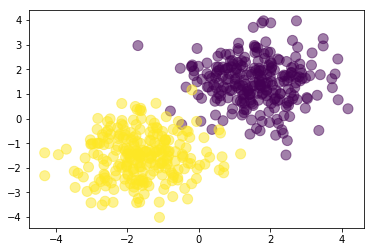

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, alpha=0.5)
plt.show()

In [45]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for basic tree: ", model.score(X, Y))

score for basic tree:  1.0


In [46]:
model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X, Y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

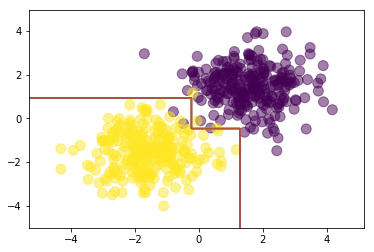

In [47]:
plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_3)
plt.show()

not linearly separable

In [48]:
np.random.seed(10)
N = 500
D = 2
X = np.random.randn(N, D)

delta = 1.75
X[:125] += np.array([delta, delta])

X[125:250] += np.array([delta, -delta])

X[250:375] += np.array([-delta, delta])
                        
X[375:] += np.array([-delta, -delta])

Y = np.array([0] * 125 + [1]*125 + [1]*125 +[1]*125)

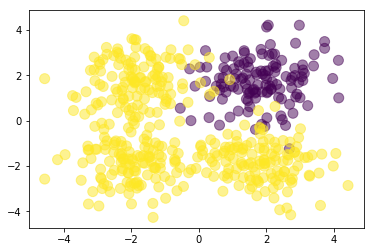

In [49]:
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, alpha=0.5)
plt.show()

score for basic tree:  1.0


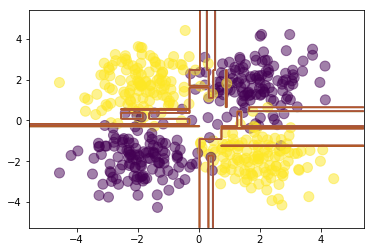

score for max depth 3:  0.922


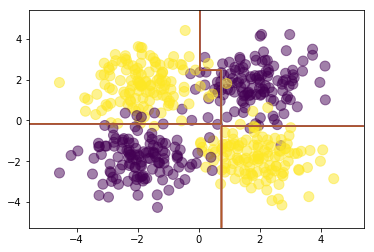

score for max depth 5:  0.97


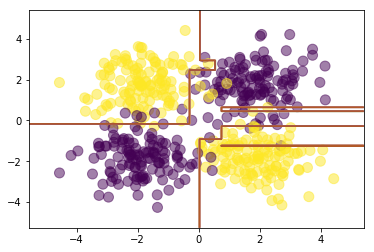

In [61]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for basic tree: ", model.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X, Y)
print("score for max depth 3: ", model_depth_3.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_3)
plt.show()

model_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_depth_5.fit(X, Y)
print("score for max depth 5: ", model_depth_5.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_5)
plt.show()

score for logistic regression:  0.936


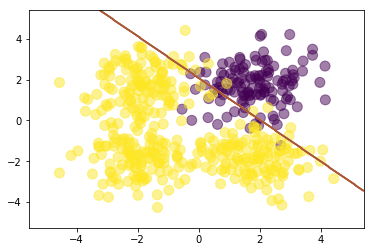

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)
print("score for logistic regression: ", model.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

A more difficult case, XOR

In [57]:
np.random.seed(10)
N = 500
D = 2
X = np.random.randn(N, D)

delta = 1.75
X[:125] += np.array([delta, delta])

X[125:250] += np.array([delta, -delta])

X[250:375] += np.array([-delta, delta])
                        
X[375:] += np.array([-delta, -delta])

Y = np.array([0] * 125 + [1]*125 + [1]*125 +[0]*125)

score for basic tree:  1.0


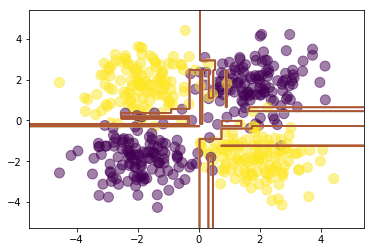

score for max depth 3:  0.922


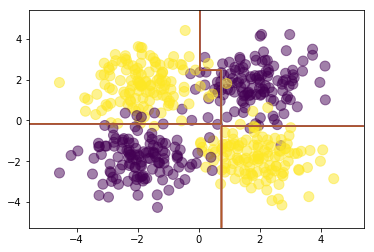

score for max depth 5:  0.97


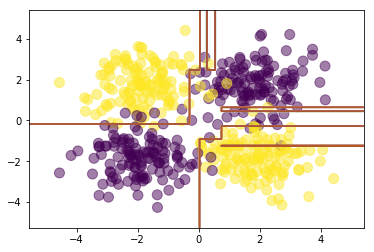

In [60]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for basic tree: ", model.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

model_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_depth_3.fit(X, Y)
print("score for max depth 3: ", model_depth_3.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_3)
plt.show()

model_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_depth_5.fit(X, Y)
print("score for max depth 5: ", model_depth_5.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model_depth_5)
plt.show()

score for logistic regression:  0.504


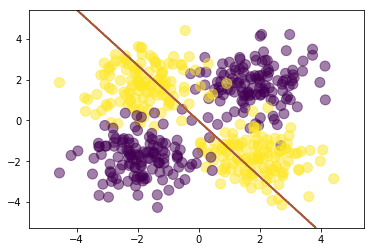

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)
print("score for logistic regression: ", model.score(X, Y))

plt.scatter(X[:,0], X[:, 1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

Summary

1. We compared decision tree and logistic regression
2. Decision tree is able to handle linearly inseparable data, logistic cannot
3. We learned how to create scatter dataset
4. We learned max depth of decision tree
5. We learned how to draw boundary of a model